In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")



In [2]:
# Load dataset
df = pd.read_csv("Top_Rated_Movies.csv")  # change filename if needed

df.head()


,Unnamed: 0,id,title,vote_average,vote_count,release_date,popularity
0,0,278,The Shawshank Redemption,8.711,29158,1994-09-23,25.3318
1,1,238,The Godfather,8.685,22026,1972-03-14,26.3705
2,2,240,The Godfather Part II,8.571,13315,1974-12-20,13.4802
3,3,424,Schindler's List,8.566,16836,1993-12-15,10.6071
4,4,389,12 Angry Men,8.548,9503,1957-04-10,9.0143


In [16]:
# Check basic info
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year
df['release_year'] = df['release_date'].dt.year

# Drop rows with missing critical values
df = df.dropna(subset=['vote_average', 'vote_count', 'popularity', 'release_year'])

df.describe()



,Unnamed: 0,id,vote_average,vote_count,popularity,release_year
count,9978.000000,9.978000e+03,9978.000000,9978.000000,9978.000000,9978.000000
mean,4989.418621,2.187675e+05,6.708017,2056.570255,4.931136,2004.487873
std,2881.404691,2.897628e+05,0.678936,3276.006389,9.860541,17.754078
min,0.000000,2.000000e+00,5.300000,300.000000,0.006900,1902.000000
25%,2494.250000,1.029550e+04,6.200000,472.000000,2.217425,1997.000000
50%,4988.500000,4.113200e+04,6.700000,861.000000,3.365300,2010.000000
75%,7484.750000,3.988945e+05,7.200000,2057.750000,5.551950,2017.000000
max,9979.000000,1.426776e+06,8.711000,38181.000000,813.479900,2025.000000


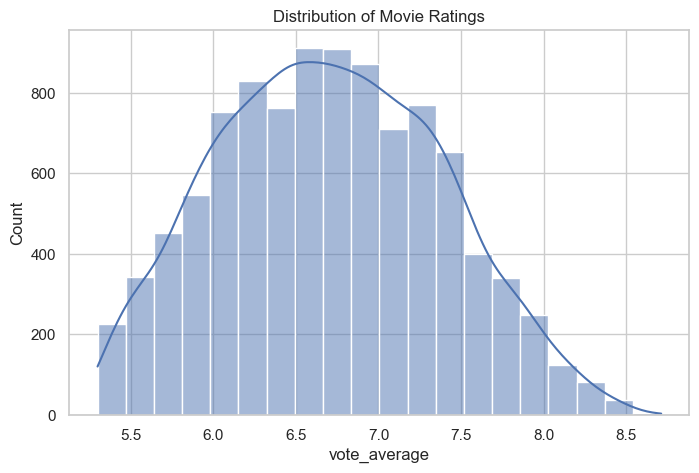

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.show()


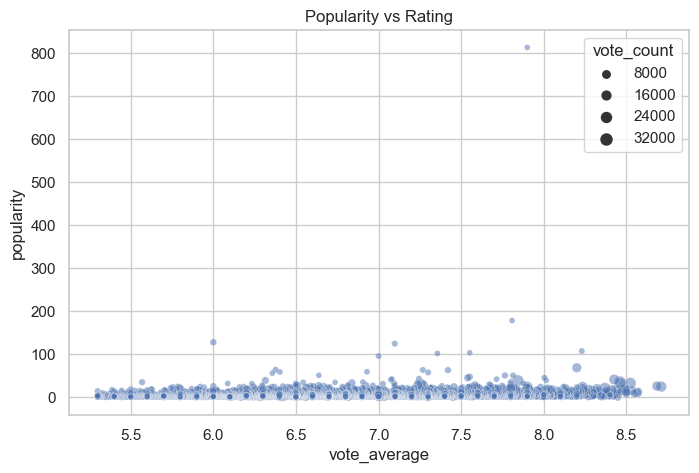

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='vote_average',
    y='popularity',
    size='vote_count',
    alpha=0.5
)
plt.title("Popularity vs Rating")
plt.show()


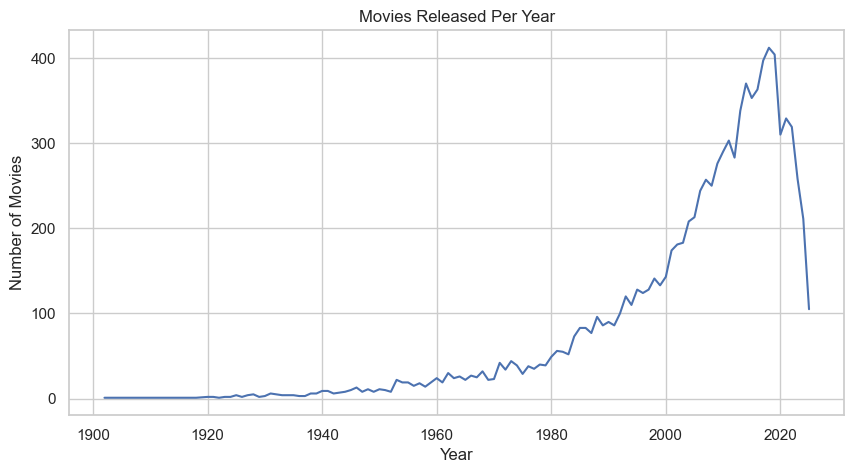

In [17]:
plt.figure(figsize=(10,5))
df['release_year'].value_counts().sort_index().plot()
plt.title("Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


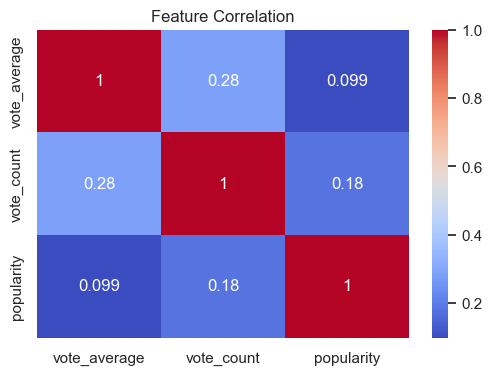

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['vote_average', 'vote_count', 'popularity']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation")
plt.show()


In [23]:
def rating_category(rating):
    if rating < 4:
        return "Poor"
    elif rating < 7:
        return "Average"
    else:
        return "Excellent"

df['rating_category'] = df['vote_average'].apply(rating_category)
df['rating_category'].value_counts()
df.head()


C:\Users\Hamza\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,Unnamed: 0,id,title,vote_average,vote_count,release_date,popularity,rating_category,release_year
0,0,278,The Shawshank Redemption,8.711,29158,1994-09-23,25.3318,Excellent,1994.0
1,1,238,The Godfather,8.685,22026,1972-03-14,26.3705,Excellent,1972.0
2,2,240,The Godfather Part II,8.571,13315,1974-12-20,13.4802,Excellent,1974.0
3,3,424,Schindler's List,8.566,16836,1993-12-15,10.6071,Excellent,1993.0
4,4,389,12 Angry Men,8.548,9503,1957-04-10,9.0143,Excellent,1957.0


In [18]:
X = df[['vote_count', 'popularity', 'release_year']]
y = df['rating_category']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=60,
    max_depth=100
)

model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=100, min_samples_split=60, n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

     Average       0.73      0.87      0.79      1293
   Excellent       0.62      0.40      0.49       703

    accuracy                           0.70      1996
   macro avg       0.67      0.63      0.64      1996
weighted avg       0.69      0.70      0.68      1996

0.7029058116232465


In [36]:

df.drop('Unnamed: 0',inplace = True , axis=1)
df.head()

,title,vote_average,vote_count,release_date,popularity,rating_category,release_year
id,,,,,,,
2,Ariel,7.099,363,1988-10-21,2.5038,Excellent,1988.0
3,Shadows in Paradise,7.271,426,1986-10-17,1.9908,Excellent,1986.0
5,Four Rooms,5.871,2748,1995-12-09,2.8818,Average,1995.0
6,Judgment Night,6.500,363,1993-10-15,3.3423,Average,1993.0
11,Star Wars,8.204,21620,1977-05-25,15.0949,Excellent,1977.0
